In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.xls', skipinitialspace=True)

In [85]:
display(df.head())
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [86]:
# Для удобства использования pandas переименуем некоторые колонки:
df.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu',
                   'Mjob': 'mjob', 'Fjob': 'fjob'}, inplace=True)

In [87]:
# 20  studytime, granular в описании задания эта колонка не значится, удалим ее
df.drop(['studytime, granular'], axis='columns', inplace=True)

In [88]:
# Отображение информации о колонке
def show_info_column(dataframe, column):
    display(dataframe[column].describe())
    plt.hist(dataframe[column], bins=30)
    plt.ylabel('Количество')
    plt.xlabel(column)
    # plt.title('Histogram');
    plt.show()
    # Нижняя граница выбросов
    minimum_emission_limit = round(
        dataframe[column].mean() - 3 * dataframe[column].std(), 0)
    # Верхняя граница выбросов
    maximum_emission_limit = round(
        dataframe[column].mean() + 3 * dataframe[column].std(), 0)
    # Количество выбросов
    quantity_of_emissions = len(dataframe[round(
        ((df[column] - dataframe[column].mean()) / dataframe[column].std()).abs(), 0) > 3].index)
    print('Границы выбросов', minimum_emission_limit, maximum_emission_limit)
    display(sns.boxplot(data=dataframe[column]))
    print('Количество выбросов', quantity_of_emissions)

In [89]:
def show_empty_column_value(dataframe):
    # Посчитаем колонки с пустыми строками
    count_empty_column_value = 0
    for column in dataframe.columns:
        if(dataframe[column].dtype == 'object'):
            if len(df[df[column].str.strip() == ''].index) > 0:
                print('В колонке ', column, ' есть пустые строковые значения')
                count_empty_column_value += 1

    if(count_empty_column_value == 0):
        print('В колонках пустых строк не найдено')
    else:
        print('Всего колонок с пустыми строками', count_empty_column_value)

In [90]:
# Удалить все строки с Nan значениями
def del_nan_value(dataframe):
    for column in dataframe.columns:
        dataframe.dropna(subset=[column], inplace=True)

In [91]:
# Ищем колонки со статистически значимыми различиями
def get_stat_dif(dataframe, column, predicted):
    cols = dataframe.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], predicted],
                     dataframe.loc[dataframe.loc[:, column] == comb[1], predicted]).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [92]:
# Заполнение значение Nan в колонке модой
def fill_nane_value_mode_value(dataframe, column):
    dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)

In [93]:
#Вывод информации о колонке 
def show_null_value_and_value_counts(dataframe, column):
    print('Nan значений', len(dataframe[dataframe[column].isnull()].index))
    print(dataframe[column].value_counts())
    print("Значений, встретившихся в столбце более 10 раз:"  # Число 10 взято для ориентира, можно брать другое
          , (dataframe[column].value_counts() > 10).sum())

In [94]:
# Возвращает моду для переданной колонке по значению в колонке score
# Если при анализе значений в колонке мода не ярко выражена то возможно, что это имеет смысл


def get_mode_value_on_score(dataframe, score, column):
    return df[(df['score'] == score) & (df[column].isnull() != True)][column].mode()[0]

In [95]:
# Заполняет Nan значения в переданной колонке группированной модой относительно колонки score
def fill_mode_value_on_score(column):
    df_nan_column = df[df[column].isnull()]
    for index, row in df_nan_column.iterrows():
        df.loc[index, column] = get_mode_value_on_score(
            df, row['score'], column)

In [96]:
# Отрисовываем boxplot для переданной колонки
def get_boxplot(datatframe, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=datatframe.loc[datatframe.loc[:, column].isin(
                    datatframe.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [97]:
# Изменияем типа значения у колонки если колонка есть в переданном списке то меняем на int иначе на str
def change_type_coilumn(dataframe, list_column_int):
    for column in dataframe.columns:
        if(column in list_column_int):
            dataframe[column] = dataframe[column].astype('int')
        else:
            dataframe[column] = dataframe[column].astype('str')

In [98]:
# Заменяем ошибочное значение в колонке неким другим возможно более правильным значением
def change_erroneous_value(dataframe, column, value1, value2):
    i = dataframe[column] == value1
    dataframe.loc[i, column] = value2

In [99]:
# Проверим есть ли колонки с пустыми строковыми значениями если есть будем заменячть на Nan
show_empty_column_value(df)

В колонках пустых строк не найдено


In [100]:
# Удалим сразу строки с пустыми значениями в колонке score
df.dropna(subset=['score'], inplace=True)

In [101]:
show_null_value_and_value_counts(df, 'school')

Nan значений 0
GP    344
MS     45
Name: school, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [102]:
show_null_value_and_value_counts(df, 'sex')

Nan значений 0
F    204
M    185
Name: sex, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [103]:
show_null_value_and_value_counts(df,'age')

Nan значений 0
16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

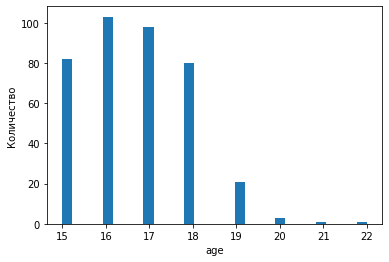

Границы выбросов 13.0 20.0


Количество выбросов 1


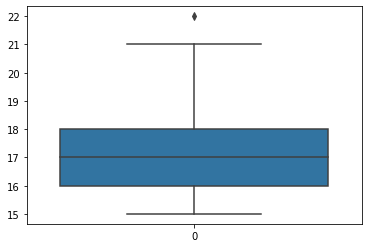

In [104]:
show_info_column(df,'age')

In [105]:
show_null_value_and_value_counts(df,'address')

Nan значений 15
U    291
R     83
Name: address, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [106]:
fill_nane_value_mode_value(df,'address')

In [107]:
show_null_value_and_value_counts(df,'famsize')

Nan значений 27
GT3    255
LE3    107
Name: famsize, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [108]:
fill_nane_value_mode_value(df,'famsize')

In [109]:
show_null_value_and_value_counts(df,'pstatus')

Nan значений 45
T    308
A     36
Name: pstatus, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [110]:
fill_nane_value_mode_value(df,'pstatus')

In [111]:
show_null_value_and_value_counts(df,'medu')

Nan значений 3
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: medu, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [112]:
fill_nane_value_mode_value(df,'medu')

In [113]:
show_null_value_and_value_counts(df,'fedu')

Nan значений 24
2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: fedu, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [114]:
# Возможно значение 40 это опечатка заменим его на 4
change_erroneous_value(df, 'fedu', 40, 4)

In [115]:
fill_nane_value_mode_value(df,'fedu')

In [116]:
show_null_value_and_value_counts(df,'mjob')

Nan значений 19
other       127
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [117]:
fill_nane_value_mode_value(df,'mjob')

In [118]:
show_null_value_and_value_counts(df,'fjob')

Nan значений 36
other       194
services     99
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [119]:
fill_nane_value_mode_value(df,'fjob')

In [120]:
show_null_value_and_value_counts(df,'reason') 

Nan значений 17
course        135
reputation    102
home          101
other          34
Name: reason, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [121]:
fill_nane_value_mode_value(df,'reason')

In [122]:
show_null_value_and_value_counts(df,'guardian')

Nan значений 31
mother    248
father     86
other      24
Name: guardian, dtype: int64
Значений, встретившихся в столбце более 10 раз: 3


In [123]:
fill_nane_value_mode_value(df,'guardian')

In [124]:
show_null_value_and_value_counts(df,'traveltime')

Nan значений 28
1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64
Значений, встретившихся в столбце более 10 раз: 3


In [125]:
fill_nane_value_mode_value(df,'traveltime')

In [126]:
show_null_value_and_value_counts(df,'studytime') 

Nan значений 7
2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [127]:
fill_nane_value_mode_value(df,'studytime')

In [128]:
show_null_value_and_value_counts(df,'failures')  

Nan значений 22
0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [129]:
fill_nane_value_mode_value(df,'failures')

In [130]:
show_null_value_and_value_counts(df,'schoolsup')

Nan значений 9
no     331
yes     49
Name: schoolsup, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [131]:
fill_nane_value_mode_value(df,'schoolsup')

In [132]:
show_null_value_and_value_counts(df,'famsup')

Nan значений 38
yes    216
no     135
Name: famsup, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [133]:
fill_nane_value_mode_value(df,'famsup')

In [134]:
show_null_value_and_value_counts(df,'paid')  

Nan значений 39
no     197
yes    153
Name: paid, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [135]:
fill_nane_value_mode_value(df,'paid')

In [136]:
show_null_value_and_value_counts(df,'activities')

Nan значений 14
yes    192
no     183
Name: activities, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [137]:
fill_nane_value_mode_value(df,'activities')

In [138]:
show_null_value_and_value_counts(df,'nursery')

Nan значений 15
yes    297
no      77
Name: nursery, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [139]:
fill_nane_value_mode_value(df,'nursery')

In [140]:
show_null_value_and_value_counts(df,'higher')

Nan значений 20
yes    350
no      19
Name: higher, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [141]:
fill_nane_value_mode_value(df,'higher')

In [142]:
show_null_value_and_value_counts(df,'internet') 

Nan значений 34
yes    300
no      55
Name: internet, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [143]:
fill_nane_value_mode_value(df,'internet')

In [144]:
show_null_value_and_value_counts(df,'romantic') 

Nan значений 31
no     235
yes    123
Name: romantic, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [145]:
fill_nane_value_mode_value(df,'romantic')

In [146]:
show_null_value_and_value_counts(df,'famrel') 

Nan значений 27
 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


In [147]:
#Возможно значение -1 это ошибка заменим его на моду
change_erroneous_value(df,'famrel',-1,4)

In [148]:
fill_nane_value_mode_value(df,'famrel')

In [149]:
show_null_value_and_value_counts(df,'freetime')  

Nan значений 9
3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [150]:
fill_nane_value_mode_value(df,'freetime')

In [151]:
show_null_value_and_value_counts(df,'goout') 

Nan значений 7
3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [152]:
fill_nane_value_mode_value(df,'goout')

In [153]:
show_null_value_and_value_counts(df,'health') 

Nan значений 15
5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


In [154]:
fill_nane_value_mode_value(df,'health')

In [155]:
show_null_value_and_value_counts(df,'absences')  

Nan значений 11
0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64
Значений, встретившихся в столбце более 10 раз: 8


In [156]:
#Возможно это опечатка значение не 385, а 3 и значение score 85
change_erroneous_value(df,'absences',385,3)

In [157]:
fill_mode_value_on_score('absences')

count    389.000000
mean       6.141388
std       13.202743
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      212.000000
Name: absences, dtype: float64

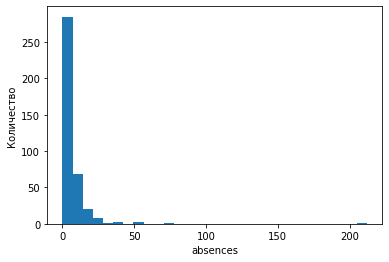

Границы выбросов -33.0 46.0


Количество выбросов 4


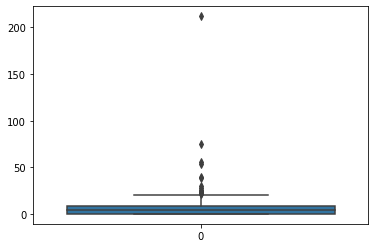

In [158]:
show_info_column(df,'absences')

In [159]:
df = df[df.absences<46]#Удалим выбросы

Преобразуем типы колонок количественные к int номинативные к str,для удобства, в дальнейшем при обработке модели их необходимо будет снова изменять

In [160]:
list_column_int = ['age','absences','score']
change_type_coilumn(df,list_column_int)

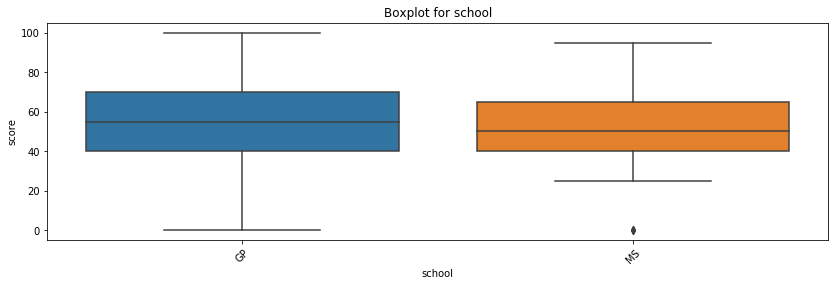

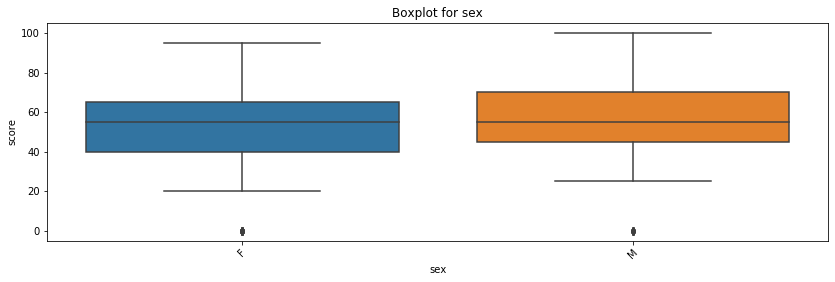

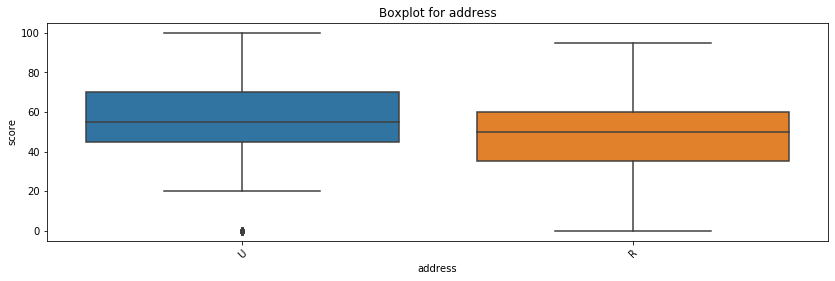

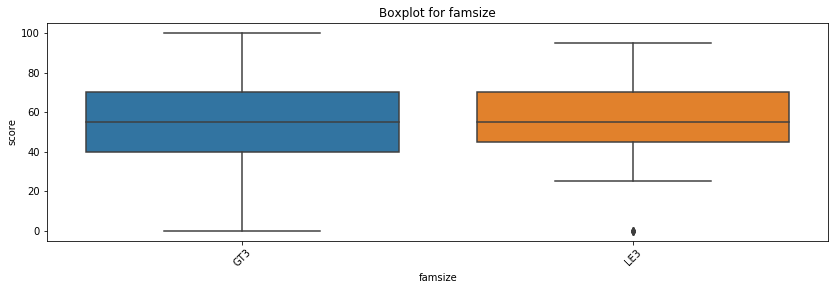

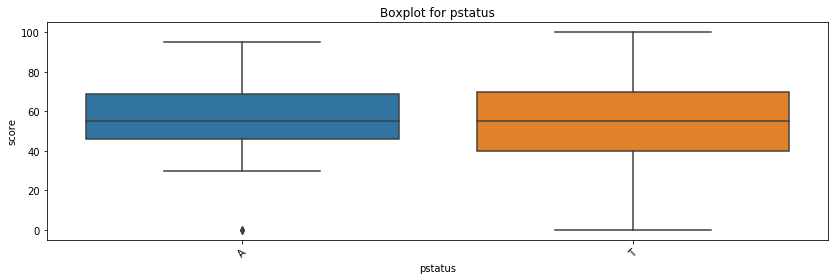

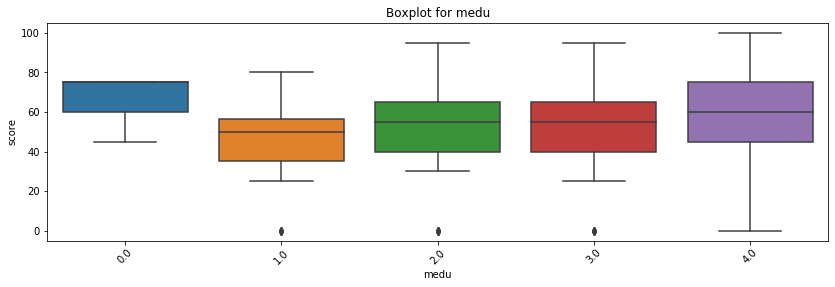

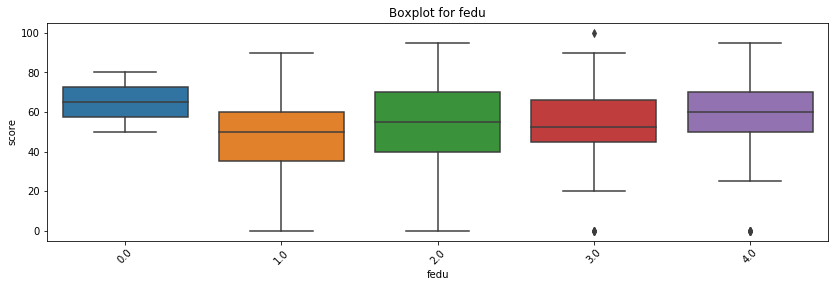

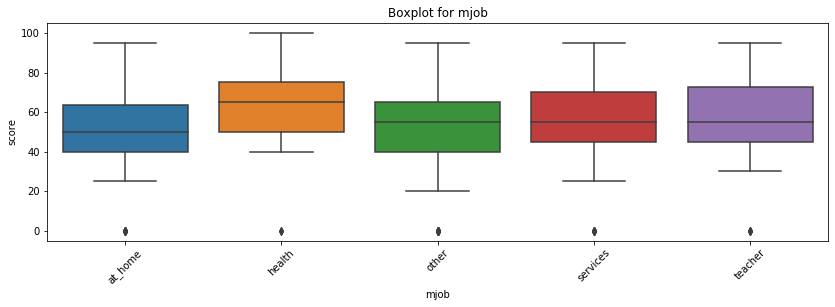

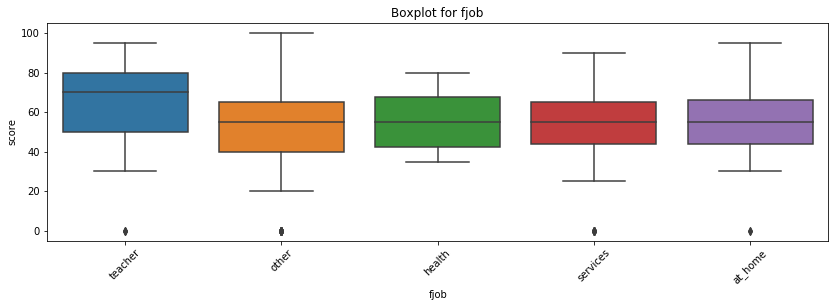

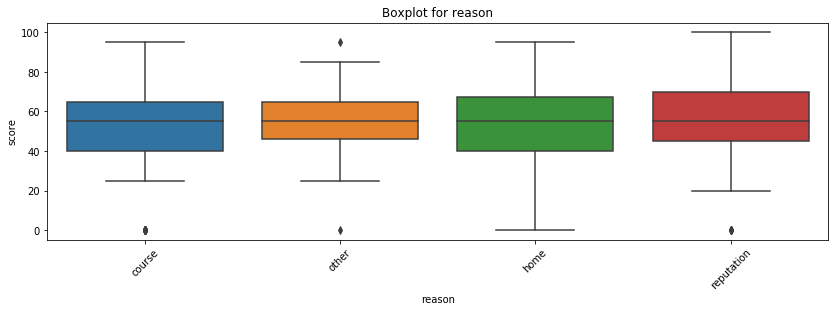

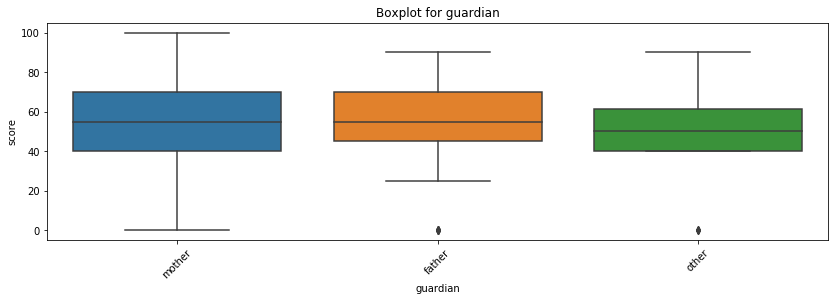

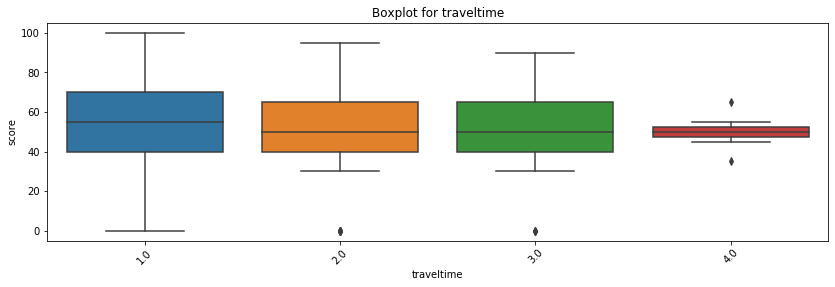

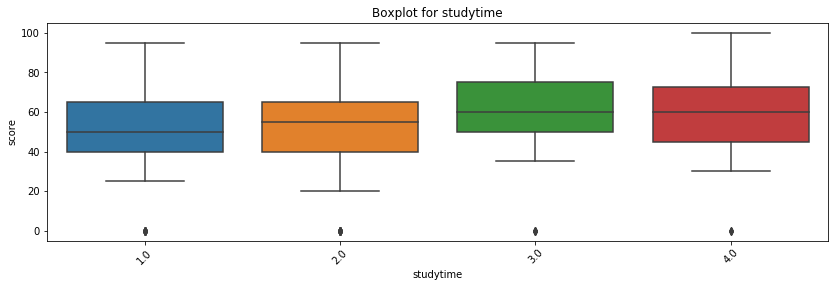

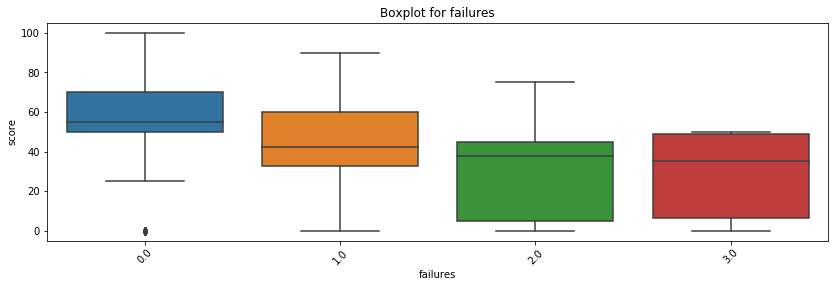

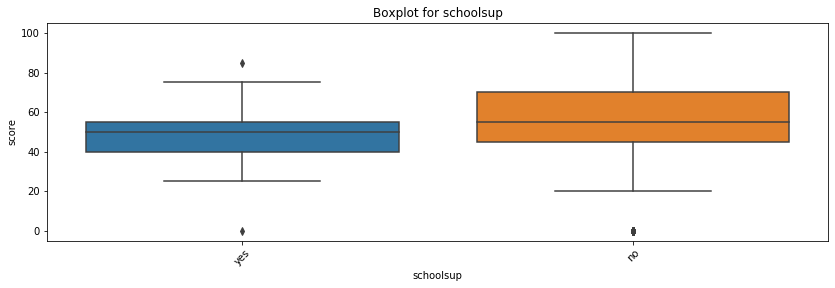

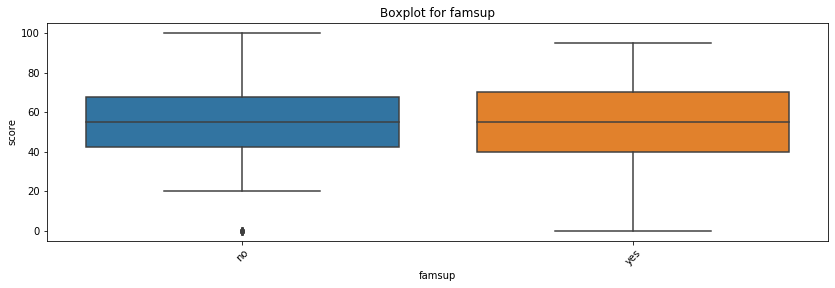

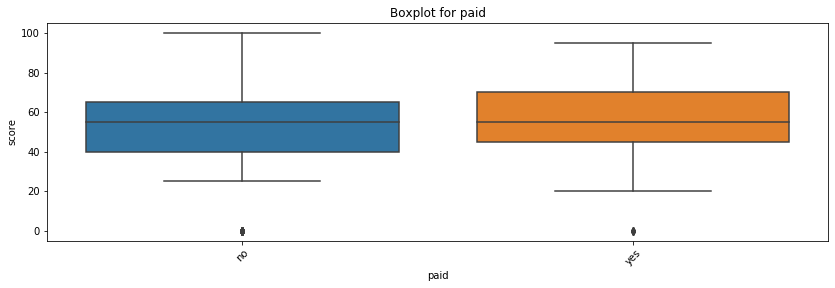

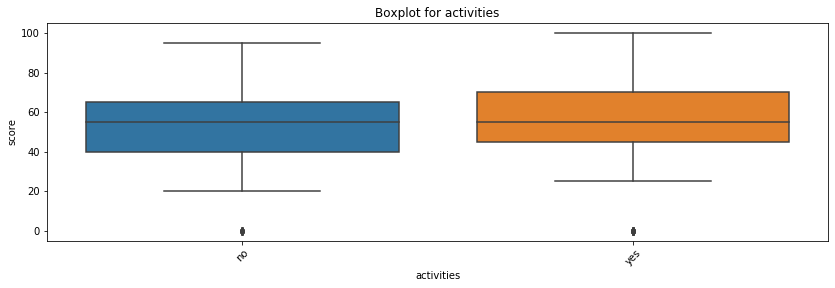

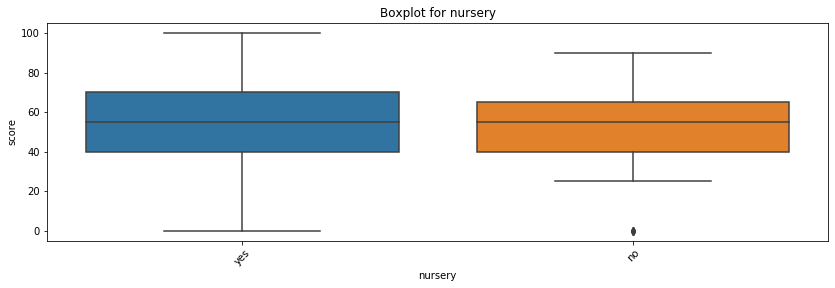

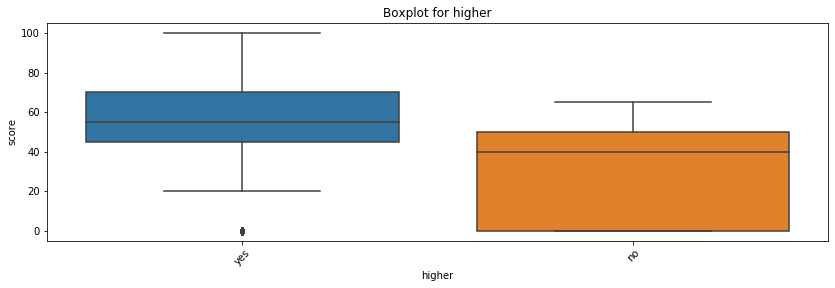

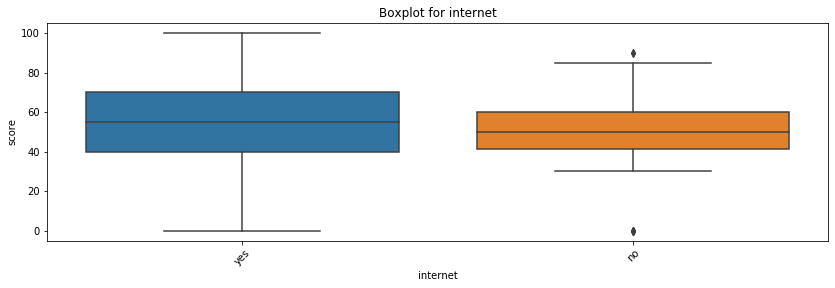

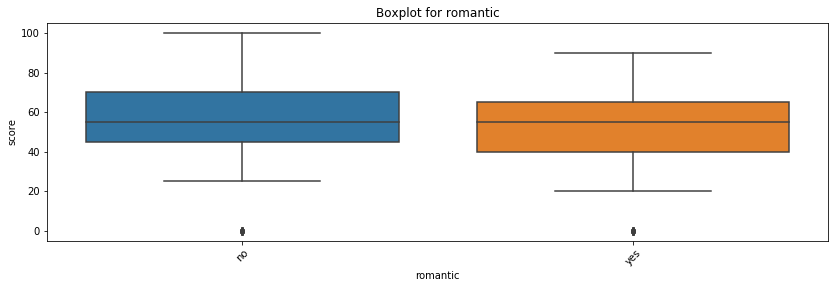

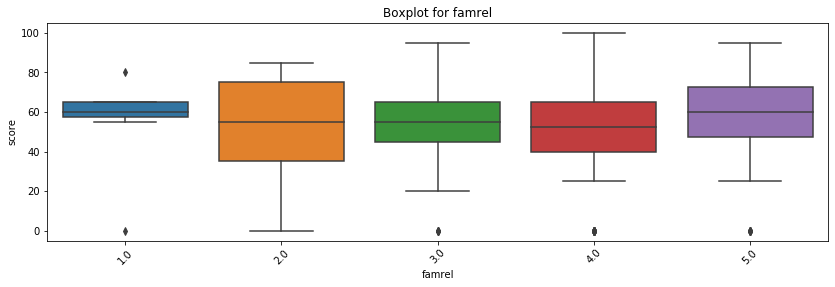

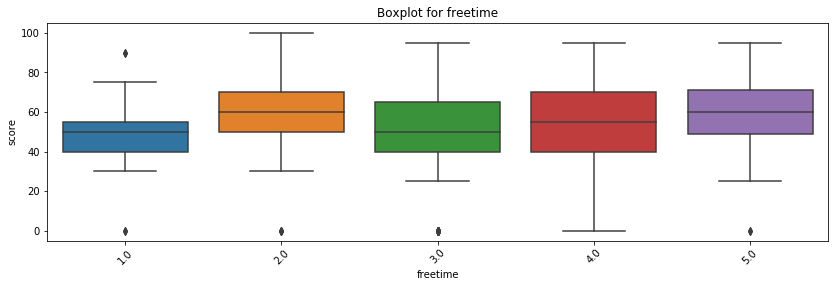

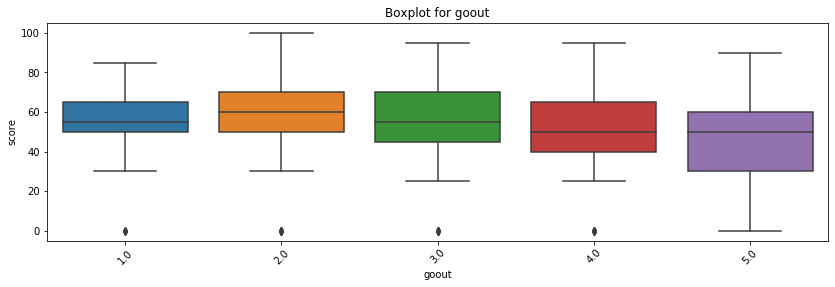

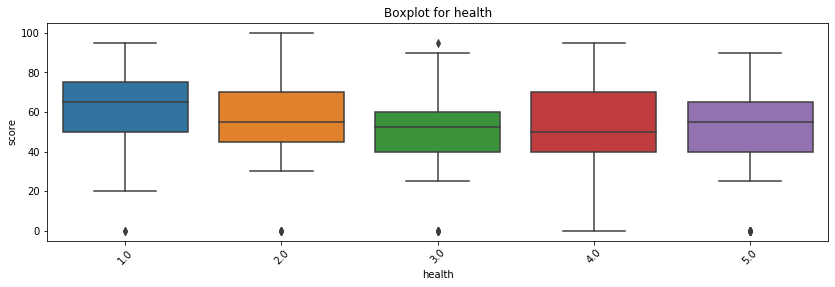

In [161]:
# Проанализируем номинативные переменные
for col in df.columns:
    if(df[col].dtype == 'object'):
        get_boxplot(df,col)

In [162]:
# Из графика выше видно , что влияет на score
#medu,fedu,studytime,failures,higher ,freetime,goout,health

In [163]:
for col in ['medu', 'fedu', 'studytime', 'failures', 'higher','freetime','goout','health']:
    get_stat_dif(df,col,'score')

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher


In [164]:
# Как мы видим серьёзно отличаются три параметра:
df_for_model =  df.loc[:, ['medu', 'failures', 'higher']]

In [165]:
df.corr()

,age,absences,score
age,1.000000,0.190855,-0.153952
absences,0.190855,1.000000,0.046728
score,-0.153952,0.046728,1.000000


Так же необходимо оставить колонки absences	и age возможно они так же влияют на результат